# Modeling and Simulation in Python

Chapter 8

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import matplotlib.pyplot as plt

### Functions from the previous chapter

In [2]:
def get_first_label(series):
    """Get the first label of a pandas Series."""
    return series.index[0]
def get_last_label(series):
    """Get the first label of a pandas Series."""
    return series.index[-1]

def get_first_value(series):
    """Get the first value of a pandas Series."""
    return series.iloc[0]

def get_last_value(series):
    """Get the first value of a pandas Series."""
    return series.iloc[-1]

def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plt.plot(census, ':', label='US Census')
    plt.plot(un, '--', label='UN DESA')
    plt.plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [3]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

### Reading the data

In [4]:
def read_table2(filename = 'ModSimPy/notebooks/data/World_population_estimates.html'):
    tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
    table2 = tables[2]
    table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
    return table2

In [5]:
table2 = read_table2()
#table2.to_csv('data/World_population_estimates2.csv')

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2012,7013871313,7.057075e+09,7.080072e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,7092128094,7.136796e+09,7.162119e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,7169968185,7.238184e+09,7.243784e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# table2 = pd.read_csv('ModSimPy/notebooks/data//World_population_estimates2.csv')
# table2.index = table2.Year
# table2.head()

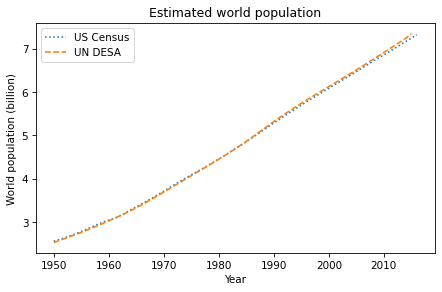

In [7]:
un = table2.un / 1e9
census = table2.census / 1e9
plt.plot(census, ':', label='US Census')
plt.plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title='Estimated world population')

### Running the quadratic model

Here's the update function for the quadratic growth model with parameters `alpha` and `beta`.

In [8]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

Extract the starting time and population.

In [9]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = get_first_value(census)

2.557628654

Initialize the system object.

In [10]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

namespace(t_0=1950, t_end=2016, p_0=2.557628654, alpha=0.025, beta=-0.0018)

Run the model and plot results.

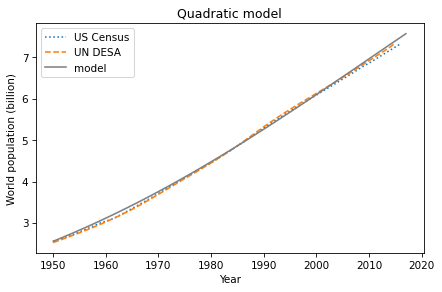

In [11]:
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'Quadratic model')

### Generating projections

To generate projections, all we have to do is change `t_end`

Saving figure to file chap08-fig01.pdf


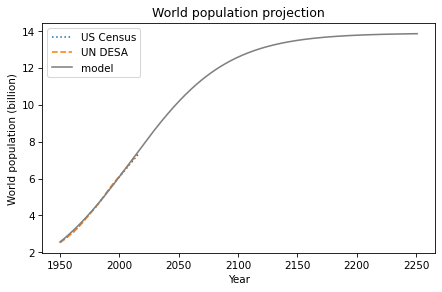

In [12]:
system.t_end = 2250
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'World population projection')
savefig('chap08-fig01.pdf')

The population in the model converges on the equilibrium population, `-alpha/beta`

In [13]:
results[system.t_end]

13.856665141368708

In [14]:
-system.alpha / system.beta

13.88888888888889

**Exercise:**  What happens if we start with an initial population above the carrying capacity, like 20 billion?  Run the model with initial populations between 1 and 20 billion, and plot the results on the same axes.

Saving figure to file chap08-fig02.pdf


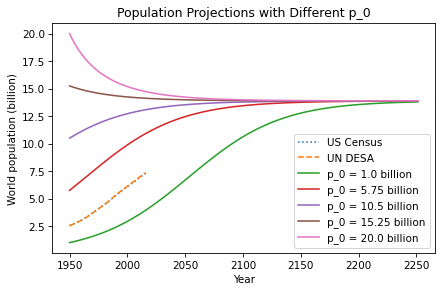

In [15]:
# Solution goes here

def plot_results_mod(census, un, sweep_series, title):
    
    plt.plot(census, ':', label='US Census')
    plt.plot(un, '--', label='UN DESA')
    
    for p_0, results in sweep_series.items():
        plt.plot(results, label=f'p_0 = {p_0} billion')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)
    plt.legend()


initial_populations = linspace(1, 20, 5)


sweep = SweepSeries()


for p_0 in initial_populations:
    system = System(t_0=t_0, t_end=2250, p_0=p_0, alpha=0.025, beta=-0.0018)
    results = run_simulation(system, update_func_quad)
    sweep[p_0] = results


plot_results_mod(census, un, sweep, 'Population Projections with Different p_0')
savefig('chap08-fig02.pdf')



### Comparing projections

We can compare the projection from our model with projections produced by people who know what they are doing.

In [16]:
def read_table3(filename = 'ModSimPy/notebooks/data//World_population_estimates.html'):
    tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
    table3 = tables[3]
    table3.columns = ['census', 'prb', 'un']
    return table3

In [17]:
table3 = read_table3()
t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = get_first_value(census)

2.557628654

`NaN` is a special value that represents missing data, in this case because some agencies did not publish projections for some years.

This function plots projections from the UN DESA and U.S. Census.  It uses `dropna` to remove the `NaN` values from each series before plotting it.

In [18]:
def plot_projections(table):
   
    census_proj = table.census / 1e9
    un_proj = table.un / 1e9
    
    plt.plot(census_proj.dropna(), ':', color='C0', label='US Census')
    plt.plot(un_proj.dropna(), '--', color='C1', label='UN DESA')

Run the model until 2100, which is as far as the other projections go.

In [19]:
system = System(t_0=t_0, 
                t_end=2100,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

namespace(t_0=1950, t_end=2100, p_0=2.557628654, alpha=0.025, beta=-0.0018)

Saving figure to file chap08-fig02.pdf


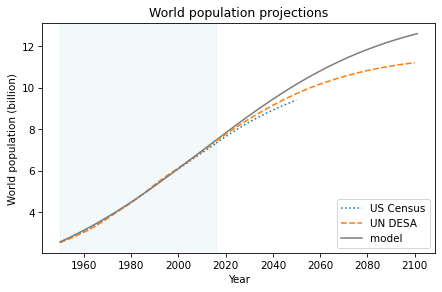

In [20]:
results = run_simulation(system, update_func_quad)

plt.axvspan(1950, 2016, color='C0', alpha=0.05)
plot_results(census, un, results, 'World population projections')
plot_projections(table3)
savefig('chap08-fig02.pdf')

People who know what they are doing expect the growth rate to decline more sharply than our model projects.

## Exercises

**Exercise:** The net growth rate of world population has been declining for several decades.  That observation suggests one more way to generate projections, by extrapolating observed changes in growth rate.

The `modsim` library provides a function, `compute_rel_diff`, that computes relative differences of the elements in a sequence.

Here's how we can use it to compute the relative differences in the `census` and `un` estimates:

In [21]:
census.diff()

Year
1950         NaN
1951    0.037311
1952    0.041832
1953    0.045281
1954    0.048175
          ...   
2012    0.077872
2013    0.078257
2014    0.077840
2015    0.077925
2016    0.078104
Name: census, Length: 67, dtype: float64

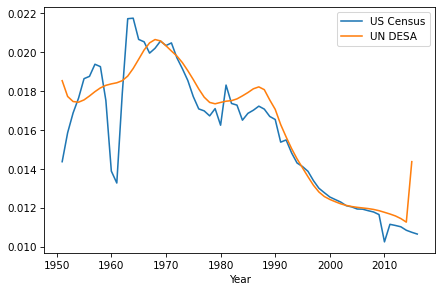

In [22]:
alpha_census = census.diff()/census
plt.plot(alpha_census, label='US Census')

alpha_un = un.diff()/un
plt.plot(alpha_un, label='UN DESA')

decorate(xlabel='Year', label='Net growth rate')

Other than a bump around 1990, net growth rate has been declining roughly linearly since 1965.  As an exercise, you can use this data to make a projection of world population until 2100.

1. Define a function, `alpha_func`, that takes `t` as a parameter and returns an estimate of the net growth rate at time `t`, based on a linear function `alpha = intercept + slope * t`.  Choose values of `slope` and `intercept` to fit the observed net growth rates since 1965.

2. Call your function with a range of `ts` from 1960 to 2020 and plot the results.

3. Create a `System` object that includes `alpha_func` as a system variable.

4. Define an update function that uses `alpha_func` to compute the net growth rate at the given time `t`.

5. Test your update function with `t_0 = 1960` and `p_0 = census[t_0]`.

6. Run a simulation from 1960 to 2100 with your update function, and plot the results.

7. Compare your projections with those from the US Census and UN.

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# Solution goes here
alpha_census = alpha_census.dropna()
def alpha_func(t):
   
    reg = LinearRegression()
    reg = reg.fit(alpha_census.index.to_numpy().reshape(-1, 1), alpha_census.to_numpy().reshape(-1, 1))
    slope = reg.coef_[0]
    intercept = reg.intercept_[0]
    
    alpha = intercept + slope * t
    return float(alpha)

/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_37216/778296072.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(alpha)
/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_37216/778296072.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(alpha)
/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_37216/778296072.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(alpha)
/var/folders/61/8qjm5s6j2

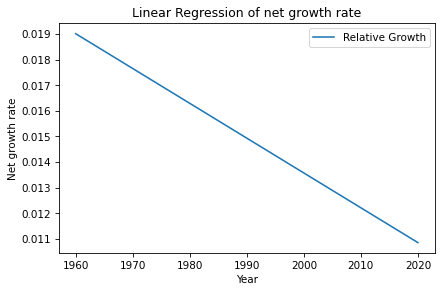

In [25]:
# Solution goes here
ts = linspace(1960, 2020, 60)
sweep = SweepSeries()
for t in ts:
    sweep[t] = alpha_func(t)

plt.plot(sweep, label='Relative Growth')
decorate(xlabel='Year', ylabel='Net growth rate', title='Linear Regression of net growth rate')

In [26]:
# Solution goes here
system = System(t_0=1960, t_end=2100, p_0=census[1960], alpha_func=alpha_func)

namespace(t_0=1960,
          t_end=2100,
          p_0=3.043001508,
          alpha_func=<function __main__.alpha_func(t)>)

In [27]:
# Solution goes here
def update_alpha_func(pop, t, system):
    net_growth = system.alpha_func(t)
    return pop + net_growth

In [28]:
# Solution goes here
t_0 = 1960
p_0 = census[t_0]
print(update_alpha_func(p_0, t_0, system))

3.0620106853796747


/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_37216/778296072.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(alpha)


/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_37216/778296072.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(alpha)
/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_37216/778296072.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(alpha)
/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_37216/778296072.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(alpha)
/var/folders/61/8qjm5s6j2

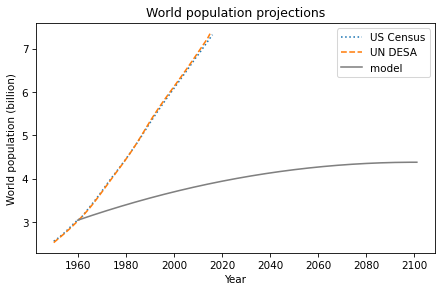

In [29]:
# Solution goes here
results = run_simulation(system, update_alpha_func)
plot_results(census, un, results, 'World population projections')


#Compare your projections with those from the US Census and UN.

As shown in the plot, our model projection differs significantly from Census and UN data. Population growth slows, peaking just around 3-4 billion, then declines as relative growth eventually turns negative as shown in previous plot

**Related viewing:** You might be interested in this [video by Hans Rosling about the demographic changes we expect in this century](https://www.youtube.com/watch?v=ezVk1ahRF78).